In [3]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

player_dict = get_players_pbp()
teams_dict, teams_list = get_teams()

box_DIR = "../data/box/"
img_DIR_P = "../data/images/players/"
fig_DIR = "../figs/players/"

In [19]:
seasons = np.arange(2024,2025)
df1 = get_box("P","Base",False,seasons)
df1["game_id"] = df1["game_id"].astype(int)
df2 = get_box("P","Adv",False,seasons)
df2 = df2[["gameid","personid","possessions"]]
df2.columns = ['game_id','player_id',"poss"]
df3 = pd.merge(df1,df2,on=['game_id','player_id'])
df3["dre"] = -8.42364*df3["poss"]/100+0.79231*df3["pts"]-0.71944*(df3["fga"]-df3["fg3a"])-0.55233*df3["fg3a"]-0.15944*df3["fta"]+0.13479*df3["oreb"]+0.3996*df3["dreb"]+0.54415*df3["ast"]+1.68007*df3["stl"]+0.76387*df3["blk"]-1.3599*df3["tov"]-0.10838*df3["pf"]

df3["gmsc"] = df3["pts"]+0.4*df3["fgm"]-0.7*df3["fga"]-0.4*(df3["fta"]-df3["ftm"])+0.7*df3["oreb"]+0.3*df3["dreb"]+df3["stl"]+0.7*df3["ast"]+0.7*df3["blk"]-0.4*df3["pf"]-df3["tov"]

In [20]:
df4 = df3[['player_id', 'player_name', 'game_date', 'dre', 'season']]
df4 = df4.sort_values(["game_date","player_id"])
df4g = df4.groupby(['player_id', 'player_name', 'season'])
keys = list(df4g.groups)

In [29]:
window = 7
dfa = []
for key in keys:
    df5 = df4g.get_group(key)
    df5["rdre"] = df5["dre"].rolling(window=window).mean()
    df5 = df5.dropna()
    df6 = df5.head(1)
    df6["cold"] = df5["rdre"].min()
    df6["hot"] = df5["rdre"].max()
    df6["diff"] = df6["hot"]-df6["cold"]
    df6["gp"] = df5["rdre"].count()
    dfa.append(df6)
df7 = pd.concat(dfa)
df7 = df7[['player_id', 'player_name', 'season', 'gp', 'hot', 'cold', 'diff']]
df7.iloc[:,3:] = df7.iloc[:,3:].round(1)
df7['player_name'] = (
    df7['player_name']
    .str.normalize('NFKD')
    .str.encode('ascii', errors='ignore')
    .str.decode('utf-8')
) 
df8 = df7.sort_values("diff",ascending=False).reset_index(drop=True)
df9 = df7.sort_values("diff",ascending=True).reset_index(drop=True)


In [30]:
df10 = df8.query("cold <= -2").reset_index(drop=True).reset_index()
df10["index"] +=1
data = df10.copy()
data["player_id"] = data["player_id"].astype(str)
len(data)

104

GT(_tbl_data=   index player_id      player_name  season  gp  hot  cold  diff
0      1   1631114   Jalen Williams    2025  37  9.7  -3.1  12.8
1      2   1630224      Jalen Green    2025  37  7.9  -2.5  10.4
2      3    203471  Dennis Schroder    2025  36  5.5  -4.8  10.3
3      4   1627741      Buddy Hield    2025  38  6.7  -3.5  10.2
4      5    201572      Brook Lopez    2025  36  6.6  -2.4   9.0
5      6   1630591      Jalen Suggs    2025  28  5.3  -3.5   8.8
6      7   1628370       Malik Monk    2025  30  5.7  -2.9   8.6
7      8   1628384       OG Anunoby    2025  39  5.2  -3.2   8.4
8      9   1629014  Anfernee Simons    2025  34  4.5  -3.7   8.2
9     10   1629631  De'Andre Hunter    2025  25  6.2  -2.0   8.2, _body=<great_tables._gt_data.Body object at 0x000001932E1B1190>, _boxhead=Boxhead([ColInfo(var='index', type=<ColInfoTypeEnum.default: 1>, column_label='#', column_align='center', column_width=None), ColInfo(var='player_id', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='center', column_width=None), ColInfo(var='player_name', type=<ColInfoTypeEnum.default: 1>, column_label='Player', column_align='left', column_width=None), ColInfo(var='season', type=<ColInfoTypeEnum.default: 1>, column_label='season', column_align='center', column_width=None), ColInfo(var='gp', type=<ColInfoTypeEnum.default: 1>, column_label='gp', column_align='center', column_width=None), ColInfo(var='hot', type=<ColInfoTypeEnum.default: 1>, column_label='Hot', column_align='center', column_width=None), ColInfo(var='cold', type=<ColInfoTypeEnum.default: 1>, column_label='Cold', column_align='center', column_width=None), ColInfo(var='diff', type=<ColInfoTypeEnum.default: 1>, column_label='Difference', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000019334646810>, _spanners=Spanners([]), _heading=Heading(title=Md(text='**Largest difference in Hottest and Coldest 7 game stretches**'), subtitle=Md(text='\nEvaluation metric is **DRE** (Daily RAPM Estimate) by Kevin Ferrigan  \nOnly Cold streches with DRE<=-2 are considered\n'), preheader=None), _stubhead=None, _source_notes=['bsky:@sradjoker.cc | x:@SravanNBA'], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns='hot', rows=[0]), grpname=None, colname='hot', rownum=0, colnum=None, styles=[CellStyleText(color='#FFFFFF', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#760521')]), StyleInfo(locname=LocBody(columns='hot', rows=[1]), grpname=None, colname='hot', rownum=1, colnum=None, styles=[CellStyleText(color='#FFFFFF', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#c03539')]), StyleInfo(locname=LocBody(columns='hot', rows=[2]), grpname=None, colname='hot', rownum=2, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#f4a582')]), StyleInfo(locname=LocBody(columns='hot', rows=[3]), grpname=None, colname='hot', rownum=3, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#dc6e58')]), StyleInfo(locname=LocBody(columns='hot', rows=[4]), grpname=None, colname='hot', rownum=4, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#de725b')]), StyleInfo(locname=LocBody(columns='hot', rows=[5]), grpname=None, colname='hot', rownum=5, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, st
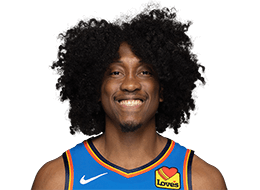
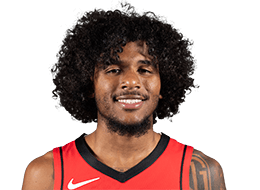
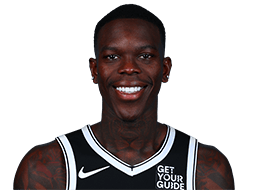
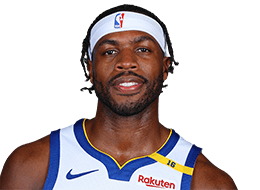
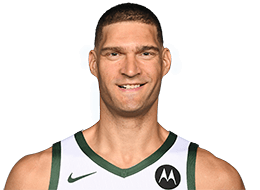
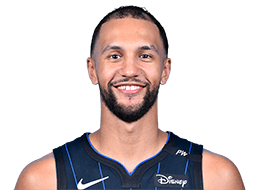
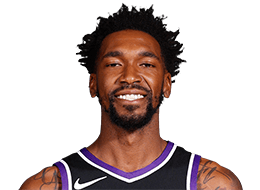
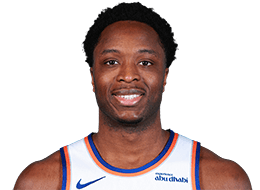
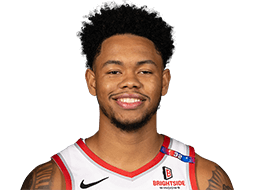
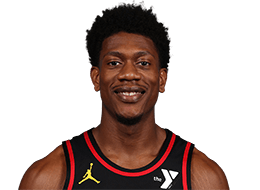

In [31]:
n = 10
title = f"**Largest difference in Hottest and Coldest {window} game stretches**"
subtitle = '''
Evaluation metric is **DRE** (Daily RAPM Estimate) by Kevin Ferrigan  
Only Cold streches with DRE<=-2 are considered
'''
t = (
    GT(data.head(n))
    .tab_header(
        title=md(title),
        subtitle=md(subtitle)
    )
    .tab_source_note(source_note="bsky:@sradjoker.cc | x:@SravanNBA")
    .cols_label(
        index = "#",
        player_id = "",
        player_name="Player",
        hot="Hot",
        cold="Cold",
        diff="Difference",
    )
    .fmt_image(
        columns="player_id",
        path = img_DIR_P,
        file_pattern="{}.png"
    )
    .cols_align(align="center")
    .cols_align(align="left", columns="player_name")
    .data_color(
        domain = [-5,10],
        columns=['hot','cold'],
        palette="RdBu",
        reverse="False"
    )
    .tab_options(
        heading_title_font_size="150%",
        heading_subtitle_font_size="110%",
        # heading_title_font_weight='bold',
        table_background_color="ghostwhite",
        column_labels_font_size="105%",
        column_labels_font_weight='bold',
        row_group_font_weight='bold',
        row_group_background_color="#E5E1D8",
        table_font_size=10,
        table_font_names="Consolas", 
        data_row_padding = "3px",
        # table_margin_left = 7,
        # table_margin_right = 0,
    )
)
t.save(fig_DIR + f"hot_cold_diff_"+ str(seasons[-1]) +".png",scale=3,web_driver="firefox")
t

In [122]:
df11 = df9.query("hot >= 5 & gp>=25").reset_index(drop=True).reset_index()
df11["index"] +=1
data = df11.copy()
data["player_id"] = data["player_id"].astype(str)
len(data)

75

GT(_tbl_data=   index player_id         player_name  gp  hot  cold  diff
0      1   1628404           Josh Hart  38  5.8   2.9   2.9
1      2    201142        Kevin Durant  27  5.6   2.7   2.9
2      3   1629008  Michael Porter Jr.  37  5.0   1.2   3.8
3      4    101108          Chris Paul  35  5.7   1.9   3.8
4      5   1629048        Goga Bitadze  30  5.4   1.3   4.1
5      6   1627783       Pascal Siakam  37  5.2   0.9   4.2
6      7   1631117      Walker Kessler  28  5.6   1.2   4.4
7      8   1630552       Jalen Johnson  29  5.6   1.0   4.6
8      9   1628389         Bam Adebayo  35  5.0   0.3   4.8
9     10   1629655      Daniel Gafford  36  5.3   0.6   4.8, _body=<great_tables._gt_data.Body object at 0x0000022B37AD7350>, _boxhead=Boxhead([ColInfo(var='index', type=<ColInfoTypeEnum.default: 1>, column_label='#', column_align='center', column_width=None), ColInfo(var='player_id', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='center', column_width=None), ColInfo(var='player_name', type=<ColInfoTypeEnum.default: 1>, column_label='Player', column_align='left', column_width=None), ColInfo(var='gp', type=<ColInfoTypeEnum.default: 1>, column_label='gp', column_align='center', column_width=None), ColInfo(var='hot', type=<ColInfoTypeEnum.default: 1>, column_label='Hot', column_align='center', column_width=None), ColInfo(var='cold', type=<ColInfoTypeEnum.default: 1>, column_label='Cold', column_align='center', column_width=None), ColInfo(var='diff', type=<ColInfoTypeEnum.default: 1>, column_label='Difference', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000022B39D02D80>, _spanners=Spanners([]), _heading=Heading(title=Md(text='**Smallest difference in Hottest and Coldest 7 game stretches**'), subtitle=Md(text='\nEvaluation metric is **DRE** (Daily RAPM Estimate) by Kevin Ferrigan  \nOnly Cold streches with DRE>=2 are considered | Min 25 games played\n'), preheader=None), _stubhead=None, _source_notes=['bsky:@sradjoker.cc | x:@SravanNBA'], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns='hot', rows=[0]), grpname=None, colname='hot', rownum=0, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#f86043')]), StyleInfo(locname=LocBody(columns='hot', rows=[1]), grpname=None, colname='hot', rownum=1, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#fa6748')]), StyleInfo(locname=LocBody(columns='hot', rows=[2]), grpname=None, colname='hot', rownum=2, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#fb7959')]), StyleInfo(locname=LocBody(columns='hot', rows=[3]), grpname=None, colname='hot', rownum=3, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#f96346')]), StyleInfo(locname=LocBody(columns='hot', rows=[4]), grpname=None, colname='hot', rownum=4, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#fb6d4d')]), StyleInfo(locname=LocBody(columns='hot', rows=[5]), grpname=None, colname='hot', rownum=5, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#fb7353')]), StyleInfo(locname=LocBody(columns='hot', rows=[6]), grpname=N
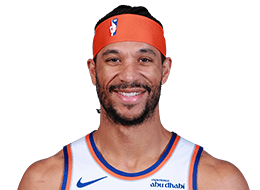
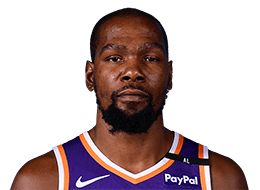
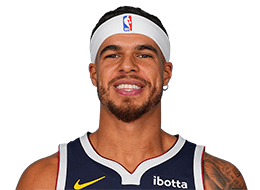
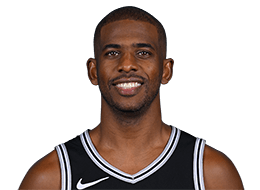
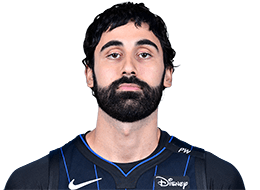
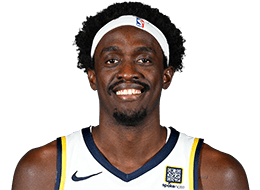
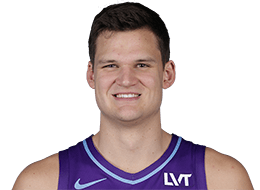
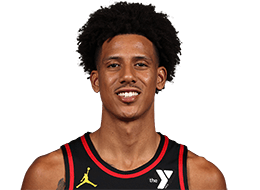
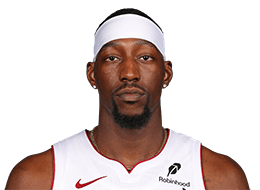
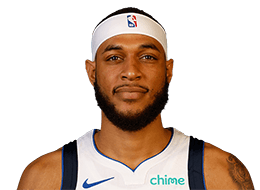

In [124]:
n = 10
title = "**Smallest difference in Hottest and Coldest 7 game stretches**"
subtitle = '''
Evaluation metric is **DRE** (Daily RAPM Estimate) by Kevin Ferrigan  
Only Cold streches with DRE>=2 are considered | Min 25 games played
'''
t = (
    GT(data.head(n))
    .tab_header(
        title=md(title),
        subtitle=md(subtitle)
    )
    .tab_source_note(source_note="bsky:@sradjoker.cc | x:@SravanNBA")
    .cols_label(
        index = "#",
        player_id = "",
        player_name="Player",
        hot="Hot",
        cold="Cold",
        diff="Difference",
    )
    .fmt_image(
        columns="player_id",
        path = img_DIR_P,
        file_pattern="{}.png"
    )
    .cols_align(align="center")
    .cols_align(align="left", columns="player_name")
    .data_color(
        domain = [0,11],
        columns=['hot','cold'],
        palette="Reds",
        reverse=False
    )
    .tab_options(
        heading_title_font_size="150%",
        heading_subtitle_font_size="110%",
        # heading_title_font_weight='bold',
        table_background_color="ghostwhite",
        column_labels_font_size="105%",
        column_labels_font_weight='bold',
        row_group_font_weight='bold',
        row_group_background_color="#E5E1D8",
        table_font_size=10,
        table_font_names="Consolas", 
        data_row_padding = "3px",
        # table_margin_left = 7,
        # table_margin_right = 0,
    )
)
# t.save(fig_DIR + f"hot_cold_diff_"+ str(season) +".png",scale=3,web_driver="firefox")
t